In [5]:
%load_ext autoreload
%autoreload 2

import scipy
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
import sir_model
import json
from random import randint

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
# initialize recording of parameter choices and true/false


# USER: set bounds
search_bounds = [0,1]

In [7]:
# USER: list how many points for each parameter you'd like to synthesize

values_to_synthesize = 5


In [8]:
search_points = np.linspace(search_bounds[0], search_bounds[1], values_to_synthesize)


In [9]:
alpha_val = 0.57
# beta_val = 0.011
delta_val = 0.011
# gamma_val = 0.456

epsilon_val = 0.05 #0.171
theta_val = 0.371

zeta_val = 0.125
eta_val = 0.125

mu_val = 0.017
nu_val = 0.027
lamb_val = 0.034
rho_val = 0.034

kappa_val = 0.017
xi_val = 0.017
sigma_val = 0.017

tau_val = 0.01

In [11]:
from itertools import product

for i,j, k in product(search_points, search_points, search_points):
    print(i,j, k)

0.0 0.0 0.0
0.0 0.0 0.25
0.0 0.0 0.5
0.0 0.0 0.75
0.0 0.0 1.0
0.0 0.25 0.0
0.0 0.25 0.25
0.0 0.25 0.5
0.0 0.25 0.75
0.0 0.25 1.0
0.0 0.5 0.0
0.0 0.5 0.25
0.0 0.5 0.5
0.0 0.5 0.75
0.0 0.5 1.0
0.0 0.75 0.0
0.0 0.75 0.25
0.0 0.75 0.5
0.0 0.75 0.75
0.0 0.75 1.0
0.0 1.0 0.0
0.0 1.0 0.25
0.0 1.0 0.5
0.0 1.0 0.75
0.0 1.0 1.0
0.25 0.0 0.0
0.25 0.0 0.25
0.25 0.0 0.5
0.25 0.0 0.75
0.25 0.0 1.0
0.25 0.25 0.0
0.25 0.25 0.25
0.25 0.25 0.5
0.25 0.25 0.75
0.25 0.25 1.0
0.25 0.5 0.0
0.25 0.5 0.25
0.25 0.5 0.5
0.25 0.5 0.75
0.25 0.5 1.0
0.25 0.75 0.0
0.25 0.75 0.25
0.25 0.75 0.5
0.25 0.75 0.75
0.25 0.75 1.0
0.25 1.0 0.0
0.25 1.0 0.25
0.25 1.0 0.5
0.25 1.0 0.75
0.25 1.0 1.0
0.5 0.0 0.0
0.5 0.0 0.25
0.5 0.0 0.5
0.5 0.0 0.75
0.5 0.0 1.0
0.5 0.25 0.0
0.5 0.25 0.25
0.5 0.25 0.5
0.5 0.25 0.75
0.5 0.25 1.0
0.5 0.5 0.0
0.5 0.5 0.25
0.5 0.5 0.5
0.5 0.5 0.75
0.5 0.5 1.0
0.5 0.75 0.0
0.5 0.75 0.25
0.5 0.75 0.5
0.5 0.75 0.75
0.5 0.75 1.0
0.5 1.0 0.0
0.5 1.0 0.25
0.5 1.0 0.5
0.5 1.0 0.75
0.5 1.0 1.0
0.75 0.0 0.0
0.

In [16]:
# set parameters
def ps(param_synth_method):
    param_choices_true_false = []
    for alpha_val, beta_val, gamma_val, delta_val, 
                        # parameters
                        # set parameter values
                        def alpha(t): return np.piecewise(t, [t>=0], [alpha_val])
                        def beta(t): return np.piecewise(t, [t>=0], [beta_val])
                        def delta(t): return np.piecewise(t, [t>=0], [delta_val])
                        def gamma(t): return np.piecewise(t, [t>=0], [gamma_val])

                        def epsilon(t): return np.piecewise(t, [t>=0], [epsilon_val])
                        def theta(t): return np.piecewise(t, [t>=0], [theta_val])

                        def zeta(t): return np.piecewise(t, [t>=0], [zeta_val])
                        def eta(t): return np.piecewise(t, [t>=0], [eta_val])

                        def mu(t): return np.piecewise(t, [t>=0], [mu_val])
                        def nu(t): return np.piecewise(t, [t>=0], [nu_val])
                        def lamb(t): return np.piecewise(t, [t>=0], [lamb_val])
                        def rho(t): return np.piecewise(t, [t>=0], [rho_val])

                        def kappa(t): return np.piecewise(t, [t>=0], [kappa_val])
                        def xi(t): return np.piecewise(t, [t>=0], [xi_val])
                        def sigma(t): return np.piecewise(t, [t>=0], [sigma_val])

                        def tau(t): return np.piecewise(t, [t>=0], [tau_val])


                        # USER: set initial conditions
                        I0, D0, A0, R0, T0, H0, E0 = 0.01, 0, 0, 0, 0, 0, 0
                        S0 = 1-I0-D0-A0-R0-T0-H0-E0
                        y0 = S0, I0, D0, A0, R0, T0, H0, E0 # Initial conditions vector
                        # USER: set simulation parameters
                        dt = 1
                        tstart = 0
                        tend = 100
                        tvect = np.arange(tstart, tend, dt)
                        # simulate/solve ODEs
                        sim = odeint(sir_model.SIDARTHE_model, y0, tvect, args=(alpha, beta, gamma, delta, epsilon, mu, zeta, lamb, eta, rho, theta, kappa, nu, xi, sigma, tau))
                        S, I, D, A, R, T, H, E = sim.T

                        # plot results - uncomment next line to plot time series.  not recommended for large numbers of points
                        # sir_model.plotSIR(tvect, S, I, R)
                        # USER: write query condition.
                        query_condition =  0.15 <= max(I) <= 0.3  #((0.15 <= I[10]) and I[10] <= 1.0)
                        query = '1' if query_condition else '0'
                        param_assignments = {'beta': beta_val, 'gamma': gamma_val, 'alpha': alpha_val, 'delta': delta_val, 'epsilon': epsilon_val, 'assignment': query} # for "all", go through every option. for "any", only need one good parameter choice.
                        param_choices_true_false.append(param_assignments)
                        if param_synth_method == "any" and query == '1':
                            return param_choices_true_false
    return param_choices_true_false
    
param_choices_true_false = ps("all")

In [13]:
print(param_choices_true_false)

id_number = randint(10**5, 10**6 - 1)

with open(f'sidarthe_query_auto_all_param_{id_number}.json', 'w', encoding='utf-8') as f:
    json.dump(param_choices_true_false, f, ensure_ascii=False, indent=4)

[{'beta': 0.0, 'gamma': 0.0, 'alpha': 0.0, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.1111111111111111, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.2222222222222222, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.3333333333333333, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.4444444444444444, 'assignment': '1'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.5555555555555556, 'assignment': '1'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.6666666666666666, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.7777777777777777, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 0.8888888888888888, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.0, 'alpha': 1.0, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.1111111111111111, 'alpha': 0.0, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.1111111111111111, 'alpha': 0.1111111111111111, 'assignment': '0'}, {'beta': 0.0, 'gamma': 0.1111111111111111, 'alpha': 0.2222222222222222, 'assignment': '0'}

In [14]:
# # Plot "true/false" points.  Is there any way of characterizing these regions?

# sir_model.plot_two_params("gamma", "beta", param_choices_true_false)

beta gamma


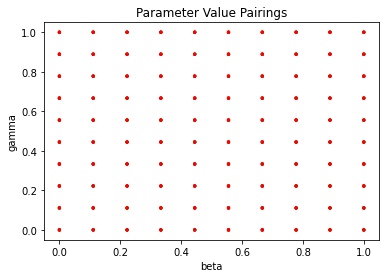

beta alpha


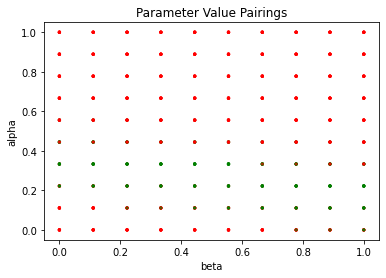

gamma alpha


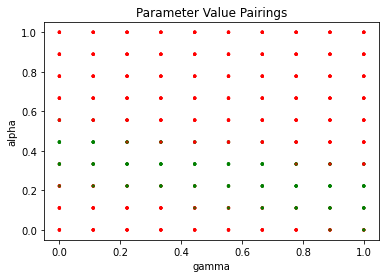

In [15]:
param_choices = list(param_choices_true_false[0].keys())
parameter_list = ([elt for elt in param_choices if elt != 'assignment'])
for i in range(len(parameter_list)):
    for j in range(i+1, len(parameter_list)):
        param1 = parameter_list[i]
        param2 = parameter_list[j]
        print(param1, param2)
        xsample = [result[param1] for result in param_choices_true_false]
        ysample = [result[param2] for result in param_choices_true_false]
        colors = ['green' if result['assignment'] == '1' else 'red' for result in param_choices_true_false]
        plt.title("Parameter Value Pairings")
        plt.xlabel(param1)
        plt.ylabel(param2)

        area = 5  # 0 to 15 point radii

        plt.scatter(xsample, ysample, s=area, c=colors, alpha=0.5)
        plt.show()